# Projet numérique de Science des Données 2025

__Binôme numéro ### -- NOM 1 Prénom 1 et NOM 2 Prénom 2__

## Introduction

Dans ce projet, il s'agira d'étudier un jeu de données concernant des femmes diabétiques enceintes. Le diabète constitue un facteur de risque pour le bon déroulé de la grossesse. Pour chacune de ces femmes, nous disposons de 7 variables :
* `Age` : l'âge en années
* `Tension systolique` : la tension systolique en mmHg
* `Tension diastolique` : la tension diastolique en mmHg
* `Glycémie` : glycémie post-prandiale en mmol/L
* `Température` : température en °C
* `FC au repos` : fréquence cardiaque au repos
* `Risque` : degré de risque obstétrique (0 : faible, 1 : moyen, 2 : élevé)


Ce projet comporte trois partie :
1. Une analyse exploratoire des données
2. La construction d'un classifieur binaire permettant de séparer les femmes dont la grossesse est à risque de celles dont elle ne l'est pas
3. La construction d'un classifieur multi-classe permettant de séparer les grossesses en trois classes : hautement à risque, moyennement à risque, faiblement à risque.

## Instructions 
* Former un binôme et l'inscrire dans Moodle.
* Renseigner le numéro de binôme et vos noms tout en haut de ce notebook à l'emplacement indiqué.
* Déposer ce notebook complété **au plus tard le 10 juillet 2025, 23h59** sur Moodle.

La présence aux séances dédiés au mini-projet (20/06 et 7/07) est **notée**. 

Les questions **1 à 14** peuvent être traitées dès la première séance. 
La question **15** peut être traitée après la PC4.
Les questions **16 à 30** peuvent être traitées à partir de la PC5.

Pour des raisons pédagogiques (voir la note à ce sujet), **l'usage d'assistants de code ou d'agents conversationnels tels que ChatGPT, Copilot, Claude, LeChat est prohibé. Leur utilisation sera sanctionnée.**

### Question 1 (1pt)

Les données ont été récoltées dans une région défavorisée du monde, où les populations sont très pauvres et peuvent difficilement consulter. Quel peut être l'intérêt de déléguer à un algorithme la prédiction du risque obstétrique ? Quelles peuvent être les dérives (sociales, éthiques, économiques, psychologiques) d'une telle pratique ?

## Librairies usuelles

In [1]:
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

np.random.seed(19) 

## Chargement des données

Nous allons pour l'instant travailler avec le jeu de données d'entraînement `data/donnees_entrainement.csv` :

In [2]:
df_train = pd.read_csv('data/donnees_entrainement.csv')

Commençons par en extraire deux arrays, `X_train` et `y_train`, contenant d'une part les variables décrivant les observations et d'autre part leurs étiquettes :

In [3]:
X_train = np.array(df_train.drop('Risque', axis=1))
y_train = np.array(df_train['Risque'], dtype='int')

In [4]:

df_train.head()

,Age,Tension systolique,Tension diastolique,Glycémie,Température,FC au repos,Risque
0,21.0,85.0,55.0,7.0,36.2,84.0,1
1,36.0,145.0,100.0,6.9,39.5,73.0,2
2,15.5,120.0,75.0,7.4,39.0,74.0,0
3,49.0,135.0,100.0,15.9,37.8,72.0,1
4,56.5,120.0,90.0,12.0,36.9,74.0,1


In [5]:
names = df_train.columns
names[2]

'Tension diastolique'

# 1. Exploration de données

## Distributions des variables

### Question 2 (1 pt)
Pour chaque variable, affichez un histogramme de sa distribution dans chacune des trois classes.

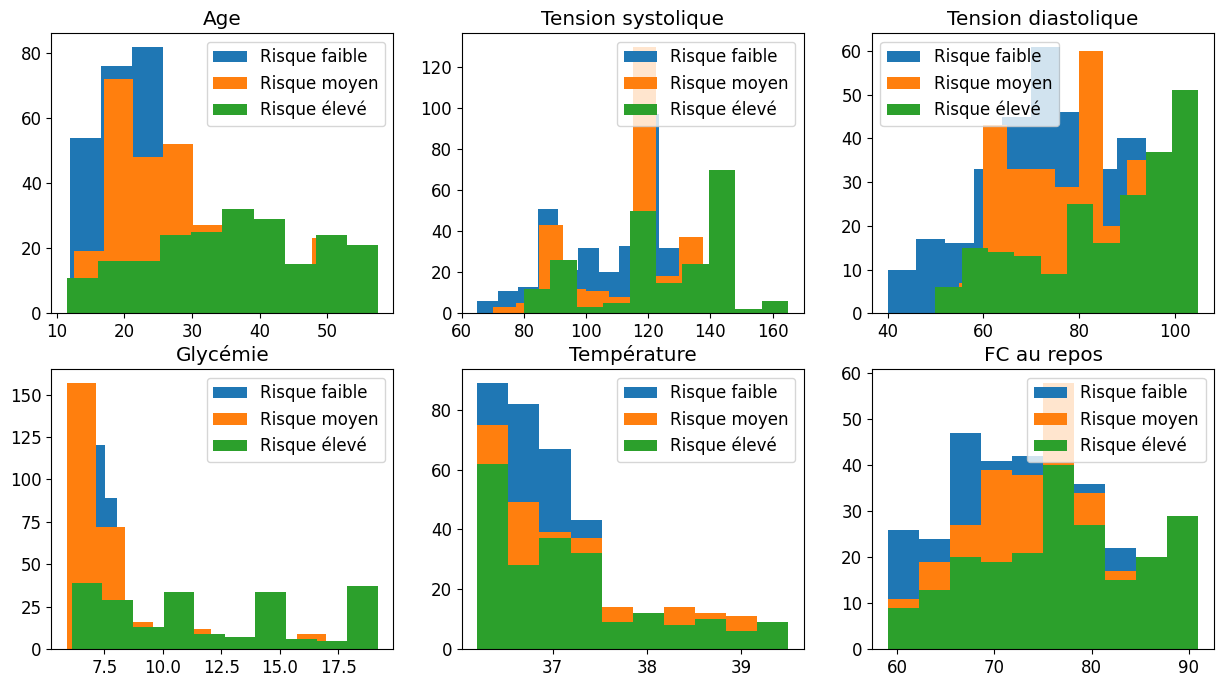

In [6]:
fig = plt.figure(figsize=(15,8))

for k in range(X_train.shape[1]):
    fig.add_subplot(2,3,k+1)
    plt.hist(X_train[y_train == 0, k], label='Risque faible')
    plt.hist(X_train[y_train == 1, k], label='Risque moyen')
    plt.hist(X_train[y_train == 2, k], label='Risque élevé')

    plt.title(names[k])
    plt.legend()

### Question 3 (1 pt)
Les valeurs prises par ces variables sont-elles surprenantes ? Cohérentes avec le degré de risque ?

var coherentes = age, tension systolique et diastique
celle on peut pas dire grand chose = température, glycémie et FC

### Question 4 (1 pt)
Pensez-vous qu'il va être facile/difficile de prédire le risque de grossesse à risque en utilisant ces 6 variables ?

## Réduction de dimension

Indépendamment de votre réponse à la question précédente, nous allons procéder à deux tentatives de réduction de dimension.

### Question 5 (1 pt)
Utilisez la décomposition en composantes principales de `X_train` pour visualiser les données en deux dimensions.

D'abord nous allons standardisé les données ie les centré et réduire

In [7]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_scaled = std_scale.transform(X_train)

In [8]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)


pca.fit(X_scaled)
X_p = pca.transform(X_scaled)

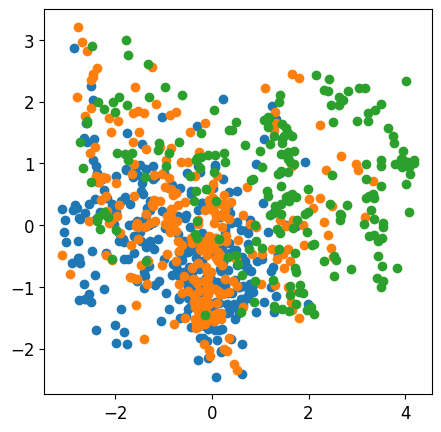

In [9]:


fig = plt.figure(figsize=(5,5))

for k in range(3):
    
    plt.scatter(X_p[y_train == k,0],X_p[y_train == k,1])




### Question 6 (1 pt) 
Pensez-vous utile d'utiliser cette ACP pour réduire la dimension des données pour construire un prédicteur de risque de grossesse difficile ?

les 3 groupes sont assez melangés ce qui veut dire que les 2 premieres composantes ne sont pas suffiseament discriminantes pour construire le prédicteur

### Question 7 (0,5 pt)
Affichez la matrice de corrélation entre les variables (étiquette exclue)

Text(0.5, 1.0, 'Matrice de corrélation')

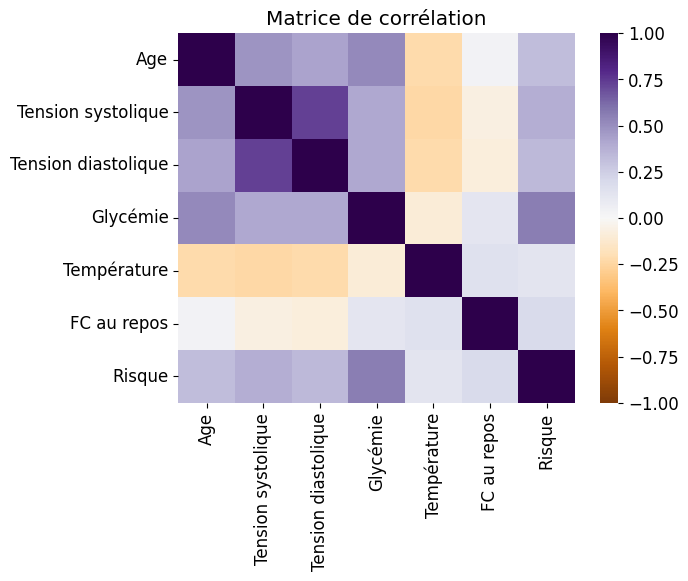

In [10]:
#M_corr = df_train.drop('Risque', axis=1).corr()
M_corr = df_train.corr()

import seaborn as sns 
sns.heatmap(M_corr, 
            vmin=-1, # borne inf des valeurs à afficher
            vmax=1, # borne sup des valeurs à afficher
            center= 0, # valeur médiane des valeurs à afficher,
            cmap='PuOr', # colormap divergente de violet (PUrple) vers orange (ORange)
           )
plt.title("Matrice de corrélation")


In [11]:
np.array(M_corr)[2,1]

np.float64(0.7286998335274497)

### Question 8 (0,5 pt)

Comment utiliser cette matrice de corrélation pour réduire la dimension des données ?

On cherche à enlever les variables qui sont peut informatives, 
par exemple si deux 2 variables sont tres fortement corrélé alors une seule suffit elles sont redondantes

Par exemple ici on voit que la tension systolique et diastolique sont assez fortement corrélées (à ~ 73%) 

# 2. Classification «à risque» vs «sans risque»

Nous allons maintenant transformer les étiquettes en étiquettes binaire, en regroupant les risques obstétriques moyens et élevés. Les étiquettes `1` et `2` seront regroupées en une seule étiquette `1`.

In [12]:
# Copier le dataframe initial dans un nouveau dataframe 
df_train_risk_vs_norisk = df_train.copy()

# Regrouper les étiquettes 1 et 2
df_train_risk_vs_norisk['Risque'] = np.where(df_train['Risque']==2, 1, df_train['Risque'])

# Extraction de l'array d'étiquettes
y_train_risk_vs_norisk = np.array(df_train_risk_vs_norisk['Risque'], dtype='int')

## Choix du critère d'évaluation
Pour cette section, on pourra se référer à la section 8.7.1 du poly.

### Question 9 (0,25 pt)
Quelle serait l'_accuracy_ (proportion d'observations correctement étiquetées) d'un modèle qui prédit que toutes les observations appartiennent à la classe majoritaire (c'est-à-dire la classe ayant le plus grand nombre d'observations dans les données) ? 

accuracy = (TP+TN)/(TP+TN+FP+FN) mais si notre modèle prédit que toutes les observations appartiennent à la classe majoritaire et qu'on suppose arbitrairement que la majorité est "positive" alors TN = 0 et FN = 0 et l'accuracy devient la proportion de TP.
donc accuracy = TP/(TP+FP)

In [13]:
nb_0 = np.sum(y_train_risk_vs_norisk == 0)
nb_1 = np.sum(y_train_risk_vs_norisk == 1)

print(nb_0,nb_1) # l'étiquette 1 est majoritaire et on a TP = 484
accuracy = nb_1/(nb_0+nb_1)
print("accuracy : ", accuracy)




316 484
accuracy :  0.605


### Question 10 (0,25 pt) 
La __précision équilibrée__ (_balanced accuracy_) d'un classifieur binaire est donnée par :

$$BA = \frac12 \left( \frac{\text{TP}}{\text{TP}+\text{FN}} +  \frac{\text{TN}}{\text{TN}+\text{FP}} \right)$$

Expliquez pourquoi ce critère d'évaluation est plus pertinent que l'accuracy pour sélectionner un classifieur optimal.

La différence avec l'accuracy classique c'est la balanced accuracy donne la même importance au deux classe, on a vu dans la question 9 que si une des deux classe est largement majoritaire alors l'accuracy peut être élevé même si le modèle prédit toujours la même classe si il s'agit de la classe majoritaire. la précision équilibrée corrige ce biais et est donc un meilleur critère pour choisir un classifieur optimal.


la précision équilibrée avec le modèle de la question 9 donne $BA = 0.5$ ce critère donne donc une moins bonne note que l'accuracy ce qui est logique et nous donne une meilleur estimation de ce classifieur

Dans la suite du projet, nous utiliserons ce critère, implémenté dans la méthode [metrics.balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) de scikit-learn.

## Plus proche voisin
L'algorithme du plus proche voisin associe à une observation $\vec{x}$ l’étiquette du point du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 11 (0,5 pt)
En quoi consiste la phase d'entraînement d'un tel classifieur ?

Il n'y a pas de phase d'entraînement

### Question 12 (0,5 pt)
Quelle précision équilibrée attendez-vous _sur le jeu d'entraînement_ d'un algorithme du plus proche voisin ? Pourquoi ?

Pour un point dont on connais déja la classe (pour un point du jeu d'entraînement c'est le cas) alors le point le plus proche est lui même donc la distance est nul et on a une précision parfaite.

$BA = 1$

### Question 13 (0,5 pt)
Vérifiez votre réponse sur les données, en utilisant la classe [neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

neigh = KNeighborsClassifier(1)
neigh.fit(X_train,y_train_risk_vs_norisk)

y_pred_train = neigh.predict(X_train)
bal_acc_train = balanced_accuracy_score(y_train_risk_vs_norisk, y_pred_train)

print(bal_acc_train)



1.0


### Quesion 14 (0,5 pt)
Pour cet algorithme, vaut-il mieux utiliser les données d'origine ou les données centrées-réduites ? Justifiez votre réponse.

Cette algorithme utilise la distance euclidienne cela est donc différent si on utilise les données d'origine ou standardisé.
les différentes variables n'ont pas les mêmes unités ni le même ordre de grandeur donc il est préferable comme on utilise une distance eucldienne de centré et réduire les variables.


## K plus proches voisins
L'algorithme des $K$ plus proche voisins associe à une observation $\vec{x}$ l’étiquette qui est majoritaires parmi celle des $K$ points du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 15 (1,5 pt)
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ (voir amphi 7 et PC5) pour déterminer une valeur optimale de $K$. 

* Justifiez votre choix de grille de valeurs.
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


kf = KFold(n_splits=10,shuffle=True , random_state=43)
#Grille de valeur de l'hyperparamètre K
K = { 'n_neighbors' : range(1,150)} 

knn = KNeighborsClassifier() # mon modèle

grid = GridSearchCV(knn, K, cv=kf, scoring='balanced_accuracy')

grid.fit(X_scaled, y_train_risk_vs_norisk)

GridSearchCV(cv=KFold(n_splits=10, random_state=43, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 150)},
             scoring='balanced_accuracy')

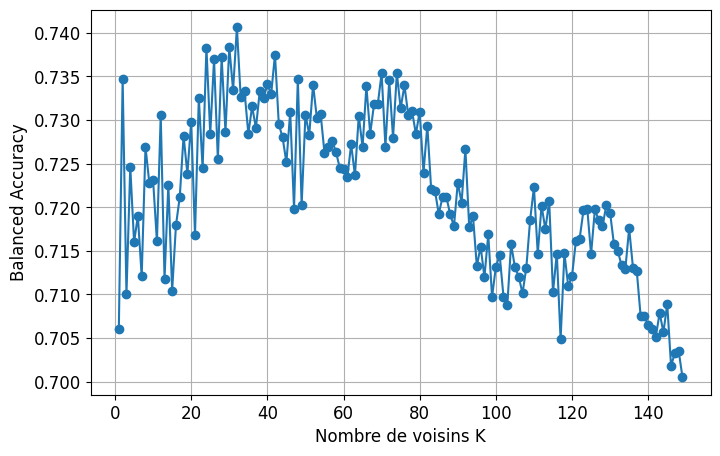

0.7406360878645329


In [16]:
#on visualise les resultats

K_valeur = K['n_neighbors']
score = grid.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(K_valeur, score, marker='o')
plt.xlabel("Nombre de voisins K")
plt.ylabel("Balanced Accuracy")
plt.grid()
plt.show()
print(max(score))

## Régression logistique
Le pendant pour la classification binaire de la régression linéaire (amphi 7 et PC 5) est la __régression logistique__ (PC 6). Dans scikit-learn, elle est implémentée par la classe [linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

### Question 16 (1 pt) 
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ pour déterminer une valeur optimale du coefficient de régularisation d'une régression logistique. 

* Justifiez votre choix de type de régularisation et de grille de valeurs. 
* Illustrez par un graphique approprié votre exploration de cette grille. 
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

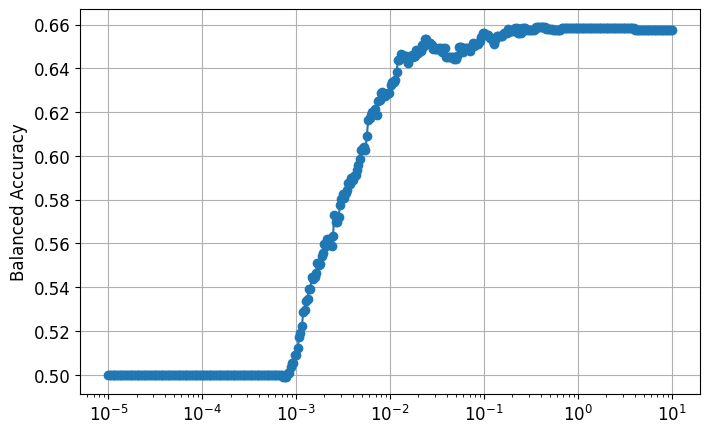

0.6590195512736081


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


kf = KFold(n_splits=10,shuffle=True , random_state=38)
param_grid = { 'C' :  np.logspace(-5, 1, 400) } 

reg_log = LogisticRegression()


grid = GridSearchCV(reg_log, param_grid, cv=kf, scoring='balanced_accuracy')

grid.fit(X_scaled, y_train_risk_vs_norisk)

#on visualise les resultats

K_valeur = param_grid['C']
score = grid.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(K_valeur, score, marker='o')
plt.ylabel("Balanced Accuracy")
plt.xscale('log')
plt.grid()
plt.show()
print(max(score))

## Algorithme non-linéaire

### Question 17 (2pt)
Choisissez maintenant un algorithme permettant d'apprendre un modèle non-linéaire parmi ceux du chapitre 9 :
* arbre de décision : [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* forêt aléatoire : [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* machine à vecteur de support à noyau : [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* perceptron multi-couche : [neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Utilisez encore une fois une recherche sur grille avec une validation croisée en 10 _folds_ pour sélectionner le(s) hyperparamètre(s) le(s) plus pertinent(s).

* Justifiez votre choix d'hyperparamètre(s) à optimiser.
* Justifiez votre choix de grille de valeurs pour ces ou cet hyperparèmtre(s).
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la ou les valeur(s) optimale(s) d'hyperparamètre(s) et la précision équilibrée correspondante.

Meilleurs hyperparamètres : {'max_depth': 10, 'n_estimators': 75}
Balanced accuracy : 0.794725543903765


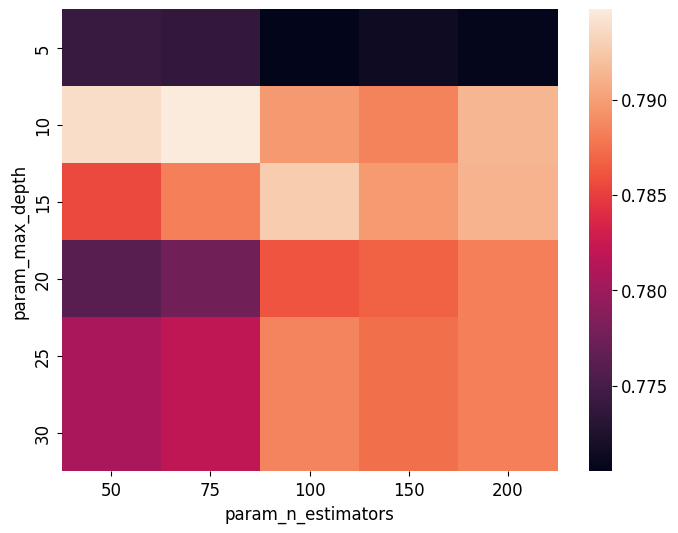

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=10,shuffle=True , random_state=18)

param_grid = {'n_estimators': [50, 75, 100,150, 200], 'max_depth':  [5, 10, 15, 20, 25, 30]}

forest = RandomForestClassifier(random_state=56)

grid = GridSearchCV(forest, param_grid, cv=kf, scoring='balanced_accuracy')
grid.fit(X_scaled, y_train_risk_vs_norisk)


print("Meilleurs hyperparamètres :", grid.best_params_)
print("Balanced accuracy :", grid.best_score_)


resultats = grid.cv_results_

#comme on a 2 hyperparametre on va illustrer avec une heatmap

import seaborn as sns
df_heatmap = pd.DataFrame(resultats).pivot_table(values='mean_test_score',index='param_max_depth',columns='param_n_estimators')

plt.figure(figsize=(8,6))
sns.heatmap(df_heatmap)
plt.show()

## Classification après réduction de dimension

Nous allons maintenant évaluer l'impact d'une réduction de dimension sur la qualité de l'apprentissage.

### Question 18 (0,25 pt)
Quel algorithme (k plus proches voisins ; régression logistique ; algorithme non-linéaire de la question 16) vous a permis d'obtenir la meilleure performance ? 

l'algo non lineaire = random forest


### Quesion 19 (0,25 pt)
Utilisez le travail des questions 4 à 7 pour créer une nouvelle matrice représentant les données dans moins de dimensions qu'originellement. 

D'apres la matrice de corrélation on peut virer une des deux tensions 

In [ ]:
X_train_reduc = np.array(df_train_risk_vs_norisk.drop('Tension diastolique', axis=1))

std_scale = preprocessing.StandardScaler().fit(X_train_reduc)
X_scaled_reduc = std_scale.transform(X_train)




### Question 20 (0,25 pt)
Utilisez encore une fois une recherche sur grille pour optimiser les performances de cet algorithme, mais entrainé sur cette nouvelle matrice. 

Meilleurs hyperparamètres : {'max_depth': 10, 'n_estimators': 50}
Balanced accuracy : 0.796677281103347


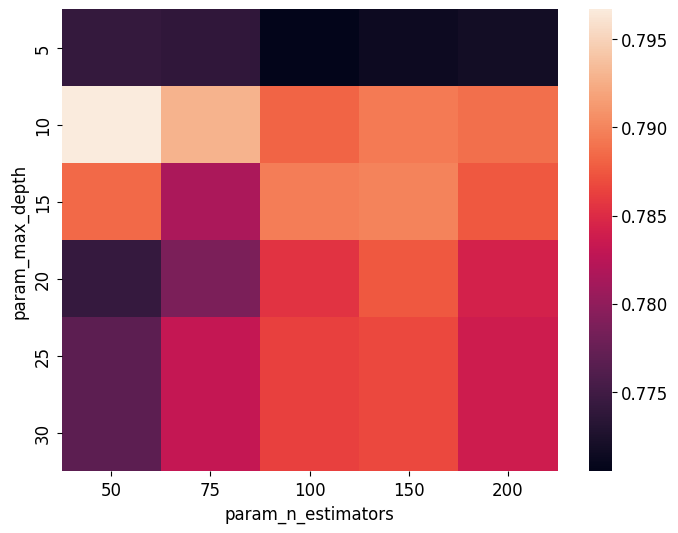

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=10,shuffle=True , random_state=18)

param_grid = {'n_estimators': [50, 75, 100,150, 200], 'max_depth':  [5, 10, 15, 20, 25, 30]}

forest = RandomForestClassifier(random_state=56)

grid = GridSearchCV(forest, param_grid, cv=kf, scoring='balanced_accuracy')
grid.fit(X_scaled_reduc, y_train_risk_vs_norisk)

best = grid.best_params_
print("Meilleurs hyperparamètres :", grid.best_params_)
print("Balanced accuracy :", grid.best_score_)


resultats = grid.cv_results_

#comme on a 2 hyperparametre on va illustrer avec une heatmap

import seaborn as sns
df_heatmap = pd.DataFrame(resultats).pivot_table(values='mean_test_score',index='param_max_depth',columns='param_n_estimators')

plt.figure(figsize=(8,6))
sns.heatmap(df_heatmap)
plt.show()

on observe une tres legere amélioration, on peut aussi tenter de faire sur l'acp 

Meilleurs hyperparamètres : {'max_depth': 5, 'n_estimators': 50}
Balanced accuracy : 0.709189847902387


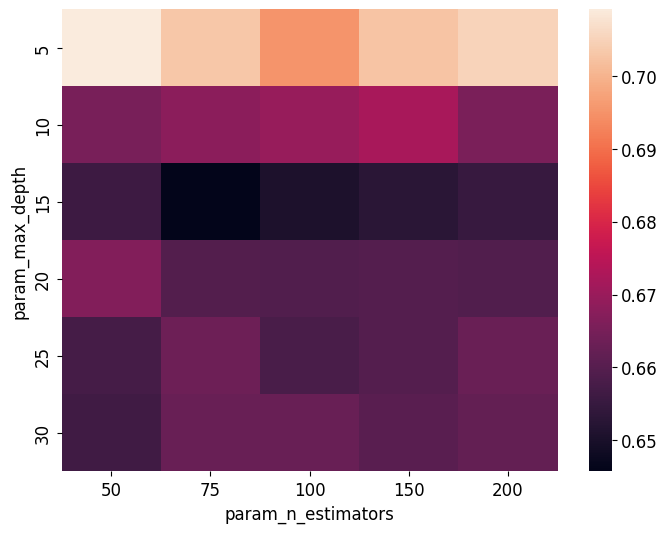

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=10,shuffle=True , random_state=18)

param_grid = {'n_estimators': [50, 75, 100,150, 200], 'max_depth':  [5, 10, 15, 20, 25, 30]}

forest = RandomForestClassifier(random_state=37)

grid = GridSearchCV(forest, param_grid, cv=kf, scoring='balanced_accuracy')
grid.fit(X_p, y_train_risk_vs_norisk)


print("Meilleurs hyperparamètres :", grid.best_params_)
print("Balanced accuracy :", grid.best_score_)


resultats = grid.cv_results_

#comme on a 2 hyperparametre on va illustrer avec une heatmap

import seaborn as sns
df_heatmap = pd.DataFrame(resultats).pivot_table(values='mean_test_score',index='param_max_depth',columns='param_n_estimators')

plt.figure(figsize=(8,6))
sns.heatmap(df_heatmap)
plt.show()

### Question 21 (0,25 pt)
La réduction de dimension a-t-elle été utile ? Commentez.

En réduisant dabord en supprimant la tension systolique nous avons ameliorer la performance de façon minime, nous avons reduit que d'une dimension.

En utilsant l'acp pour réduire à deux dimensions nous avons reduit la performance et donc cette réduction n'a pas été utile

## Classifieur final

### Question 22 (0,25 pt)
Au vu des performances observées jusqu'à présent, quel est l'algorithme d'apprentissage, son ou ses valeurs d'hyperparamètres, la transformation des données qui permettent d'obtenir la meilleure performance ? 

Utilisez cet algorithme pour entraîner un modèle de classification final `final_binary_classifier` sur l'ensemble du jeu d'entraînement.

In [39]:
best_n = best['n_estimators']
best_depth = best['max_depth']


final_binary_classifier = RandomForestClassifier(n_estimators=best_n, max_depth=best_depth, random_state=34)

#l'entrainement sur tout le jeu d'entrainement

final_binary_classifier.fit(X_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=34)

### Question 23 (0,25 pt)

Chargez les données du jeu de test `data/donnees_reservees.csv`. Combinez les étiquettes 1 et 2 en une seule classe. 

### Question 24 (0,25 pt)

Utilisez `final_binary_classifier` pour prédire les étiquettes des observations de ce jeu de données. (N'oubliez pas d'appliquer d'éventuelles transformation des données.) 

### Question 25 (0,5 pt)
Comparez la précision équilibrée sur le jeu de test à celle obtenue en validation croisée lors de la sélection de modèle. Commentez.

### Question 26 (0,25 pt)
Utilisez [metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) pour afficher la matrice de confusion de ces prédictions.

### Question 27 (0,5 pt)
Commentez cette matrice de précision.

Considéreriez vous possible d'utilise ce classifieur pour décider, sur la base de ces quelques mesures faciles à obtenir en autonomie, quelles femmes référer pour un suivi médical attentif de leur grossesse ?

# 3. Classification multi-classe

### Question 28 (0,5 pt)
Parmi les algorithmes d'apprentissage supervisé que vous avez utilisé dans la section 2, le(s)quel(s) se prête(nt) directement à entraîner un classifieur multiclasse ?

### Question 29 (1,5 pt)
Choisissez un des algorithmes mentionnés à la question précédente et entraînez-le sur le problème de classification multi-classe consistant à prédire le niveau (0, 1 ou 2) de risque obstétrique. Optimisez le ou les hyperparamètre(s) le(s) plus pertinent(s).

### Question 30 (1pt)
Utilisez cet algorithme pour entraîner un modèle multi-classe final sur l'ensemble des données d'entraînement. Évaluez ce modèle sur les données de test. Commentez.